In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_tweet.csv', encoding='latin1')
df.head()

,id,timestamp,name,tweets,loc
0,1373330766214488065,2021-03-20 17:49:04,FadilahAgiel,"Ending dewa kipas vs GM irene : Remis, antikli...",Bogor
1,1373329855509491713,2021-03-20 17:45:27,bejolicius_ID,"@maman1965 9: angka tertinggi = Raja, karena h...",NaN
2,1373329427254312960,2021-03-20 17:43:45,Itskindaruffin,The day !!\nDewa Kipas vs Irene Grandmaster ca...,NaN
3,1373328707838865414,2021-03-20 17:40:53,trendnesia,Dewa kipas vs Gm irene \n\nBapack2 pos ronda v...,Indonesia
4,1373327405729730560,2021-03-20 17:35:43,DitoKhrsmwn,dewa kipas i choose you https://t.co/c5sEOl91b9,"Depok, INA"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202841 entries, 0 to 202840
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         202841 non-null  int64 
 1   timestamp  202841 non-null  object
 2   name       202841 non-null  object
 3   tweets     202841 non-null  object
 4   loc        118798 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.7+ MB


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 0 to 202584
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         697 non-null    int64 
 1   timestamp  697 non-null    object
 2   name       697 non-null    object
 3   tweets     697 non-null    object
 4   loc        409 non-null    object
dtypes: int64(1), object(4)
memory usage: 32.7+ KB


In [6]:
df.head()

,id,timestamp,name,tweets,loc
0,1373330766214488065,2021-03-20 17:49:04,FadilahAgiel,"Ending dewa kipas vs GM irene : Remis, antikli...",Bogor
1,1373329855509491713,2021-03-20 17:45:27,bejolicius_ID,"@maman1965 9: angka tertinggi = Raja, karena h...",NaN
2,1373329427254312960,2021-03-20 17:43:45,Itskindaruffin,The day !!\nDewa Kipas vs Irene Grandmaster ca...,NaN
3,1373328707838865414,2021-03-20 17:40:53,trendnesia,Dewa kipas vs Gm irene \n\nBapack2 pos ronda v...,Indonesia
4,1373327405729730560,2021-03-20 17:35:43,DitoKhrsmwn,dewa kipas i choose you https://t.co/c5sEOl91b9,"Depok, INA"


In [7]:
def contain_candidate(tweet, candidate):
    if candidate == 'dadang':
        if any(person in tweet.lower().replace(' ', '') \
               for person in ['dadang', 'dewakipas', 'dk', 'dewa_kipas']):
            return 1
        else:
            return 0
    elif candidate == 'irene':
        if any(person in tweet.lower().replace(' ', '') \
               for person in ['irene', 'gm', 'grandmaster']):
            return 1
        else:
            return 0

In [8]:
df['dadang'] = df.tweets.apply(contain_candidate, args=('dadang',))
df['irene'] = df.tweets.apply(contain_candidate, args=('irene',))

In [9]:
df.head()

,id,timestamp,name,tweets,loc,dadang,irene
0,1373330766214488065,2021-03-20 17:49:04,FadilahAgiel,"Ending dewa kipas vs GM irene : Remis, antikli...",Bogor,1,1
1,1373329855509491713,2021-03-20 17:45:27,bejolicius_ID,"@maman1965 9: angka tertinggi = Raja, karena h...",NaN,1,1
2,1373329427254312960,2021-03-20 17:43:45,Itskindaruffin,The day !!\nDewa Kipas vs Irene Grandmaster ca...,NaN,1,1
3,1373328707838865414,2021-03-20 17:40:53,trendnesia,Dewa kipas vs Gm irene \n\nBapack2 pos ronda v...,Indonesia,1,1
4,1373327405729730560,2021-03-20 17:35:43,DitoKhrsmwn,dewa kipas i choose you https://t.co/c5sEOl91b9,"Depok, INA",1,0


In [10]:
df[['dadang', 'irene']].sum()

dadang    595
irene     460
dtype: int64

## Cleaning Tweets

In [11]:
import re
from nltk.tokenize import word_tokenize

In [12]:
def tweet_cleansing(tweet):
    tweet = tweet.lower()
    tweet = tweet.replace(',', '')
    tweet = re.sub('((www\.[^\s]+) | (https?://[^\s]+))', 'URL', tweet)
    tweet = re.sub('@[^\s]+', 'AT_USER', tweet)
    tweet = re.sub('[^\w]', ' ', tweet)
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('#([^\s]+)', '\1', tweet)
    tweet = tweet.strip('\'"')
    return tweet
    

In [13]:
df['tweets_clean'] = df.tweets.apply(tweet_cleansing).values

In [14]:
df['len_words'] = df.tweets_clean.apply(lambda x: len(x))

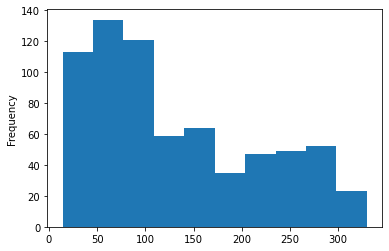

In [15]:
import matplotlib.pyplot as plt

df.len_words.plot(kind='hist');

In [16]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [17]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

stop_factory = StopWordRemoverFactory()
more_stopwords = ['dengan', 'ia', 'bahwa', 'oleh']
my_stp = stop_factory.get_stop_words() + more_stopwords
stopword = stop_factory.create_stop_word_remover()

In [18]:
df_slang = pd.read_csv('twitter_dict.csv')

In [22]:
def replace_slang(tweets):
    tweets = tweets.lower()
    res = ''
    for item in tweets.split():
        if item in df_slang.slang.values:
            res += df_slang[df_slang['slang'] == item]['formal'].iloc[0]
        else:
            res += item
        res += ' '
    return res

def my_tokenizer(tweet):
    words = word_tokenize(tweet)
    tokens=[]
    for w in words:
        #replace two or more with two occurrences
        pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
        w = pattern.sub(r"\1\1", w)
        #strip punctuation
        w = w.strip('\'"?,.')
        #check if the word stats with an alphabet or number
        val = re.search(r"^[a-zA-Z0-9][a-zA-Z0-9-]*$", w)
        #add tokens
        if(w in ['AT_USER','URL', 'youurl'] or val is None):
            continue
        else:
            #lemmatization
            w = WordNetLemmatizer().lemmatize(w)
            tokens.append(w.lower())
    
    return tokens  

In [20]:
df['tweets_clean'] = df.tweets_clean.apply(replace_slang)
df['tweets_clean'] = df.tweets_clean.apply(lambda x : stopword.remove(x))
df['tweets_clean'] = df.tweets_clean.apply(lambda x : stemmer.stem(x))

In [21]:
df.head()

,id,timestamp,name,tweets,loc,dadang,irene,tweets_clean,len_words
0,1373330766214488065,2021-03-20 17:49:04,FadilahAgiel,"Ending dewa kipas vs GM irene : Remis, antikli...",Bogor,1,1,ending dewa kipas vs gm irene remis antiklimak...,69
1,1373329855509491713,2021-03-20 17:45:27,bejolicius_ID,"@maman1965 9: angka tertinggi = Raja, karena h...",NaN,1,1,at user 9 angka tinggi raja habis 9 mbalik 0 1...,236
2,1373329427254312960,2021-03-20 17:43:45,Itskindaruffin,The day !!\nDewa Kipas vs Irene Grandmaster ca...,NaN,1,1,the day dewa kipas vs irene grandmaster catur,56
3,1373328707838865414,2021-03-20 17:40:53,trendnesia,Dewa kipas vs Gm irene \n\nBapack2 pos ronda v...,Indonesia,1,1,dewa kipas vs gm irene bapack2 pos ronda vs ka...,147
4,1373327405729730560,2021-03-20 17:35:43,DitoKhrsmwn,dewa kipas i choose you https://t.co/c5sEOl91b9,"Depok, INA",1,0,dewa kipas choose youurl,26


In [23]:
from flair.data import Sentence
from flair.models import SequenceTagger
tag_pos = SequenceTagger.load('resources/taggers/example-universal-pos/best-model.pt')

def postagger(tweets):
    sentence = Sentence(tweets)
    tag_pos.predict(sentence)
    res = ''
    tagged = sentence.get_spans()
    for item in tagged:
        if item.tag in ['NOUN', 'VERB', 'ADJ']:
            res += item.text + ' '
    return res

2021-03-21 23:22:39,875 loading file resources/taggers/example-universal-pos/best-model.pt


In [24]:
df['tweets_clean_filtered'] = df.tweets_clean.apply(postagger)

In [25]:
df[['tweets', 'tweets_clean', 'tweets_clean_filtered']].head()

,tweets,tweets_clean,tweets_clean_filtered
0,"Ending dewa kipas vs GM irene : Remis, antikli...",ending dewa kipas vs gm irene remis antiklimak...,ending dewa kipas vs gm irene remis antiklimak...
1,"@maman1965 9: angka tertinggi = Raja, karena h...",at user 9 angka tinggi raja habis 9 mbalik 0 1...,at user angka tinggi raja habis raja pion ting...
2,The day !!\nDewa Kipas vs Irene Grandmaster ca...,the day dewa kipas vs irene grandmaster catur,dewa kipas vs irene grandmaster catur
3,Dewa kipas vs Gm irene \n\nBapack2 pos ronda v...,dewa kipas vs gm irene bapack2 pos ronda vs ka...,dewa kipas bapack2 pos ronda vs kaum elite men...
4,dewa kipas i choose you https://t.co/c5sEOl91b9,dewa kipas choose youurl,dewa kipas


## Modelling

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

vectorizer = TfidfVectorizer(tokenizer=my_tokenizer,min_df=2, max_df=0.95, 
                             token_pattern='\\b[a-zA-Z][a-zA-Z][a-zA-Z]+\\b')
data = vectorizer.fit_transform(df.tweets_clean_filtered)
feature_names = vectorizer.get_feature_names()

In [38]:
n_topics = 10
n_top_words = 10

nmf = NMF(n_components=n_topics).fit(data)
W = nmf.components_
H = nmf.transform(data)

In [39]:
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topik : {topic_idx} : {' '.join([feature_names[i] for i in topic.argsort()[:-n_top_words -1 : -1]])}")

Topik : 0 : dewa kipas pegang cowok angin nih duel tau user if
Topik : 1 : gm irene v duel senin live dukung podcast pinggir jadwal
Topik : 2 : user at ma dukung mantap tebak jago maaf tim main
Topik : 3 : dadang subur eyang nama tim pengin anak gue tantang ganti
Topik : 4 : catur main dunia akun online bukti jago indonesia pakai grandmaster
Topik : 5 : menang lawan ac kalo gue akurasi irene main mah turun
Topik : 6 : url lambat akurat tarung nih langkah jitu bidak ikut klik
Topik : 7 : tanding lawan master grand sukandar kharisma irene sponsor sahabat besok
Topik : 8 : tonton bareng podcast besok senin dadang gambit dedi video tahu
Topik : 9 : kalah akurasi wajar bilang dadang hujat bukti statistik beda malu


(-0.5, 399.5, 199.5, -0.5)

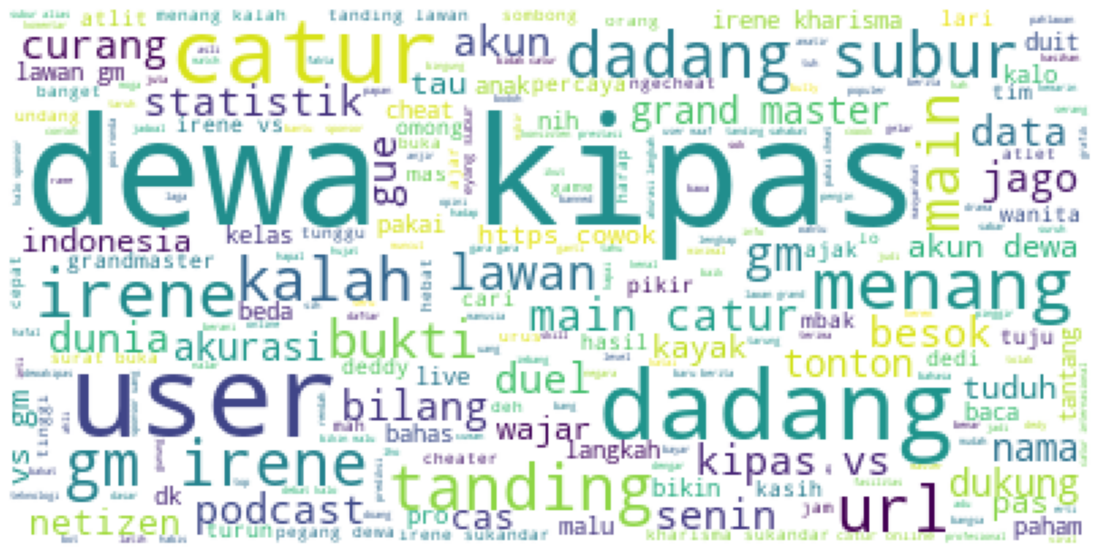

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import rcParams

rcParams['figure.figsize'] = 20, 10
str_tweets = ' '.join(df.tweets_clean_filtered.values)

wordcloud = WordCloud(background_color='white', max_words=1000).generate(str_tweets)

plt.imshow(wordcloud)
plt.axis("off")